In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

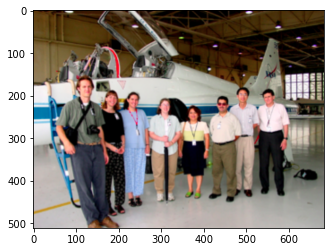

In [2]:
img = cv2.cvtColor(cv2.imread('img.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
mask = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0.6]])
mask

array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 0.6]])

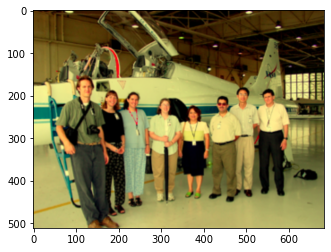

In [4]:
inputImg = np.matmul(img, mask).astype(np.uint8)
plt.imshow(inputImg)

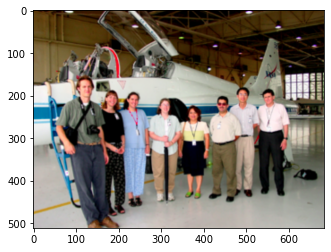

In [5]:
numMapping = 6
imgInput = inputImg
imgTarget = img

x = np.random.randint(imgInput.shape[0], size=(numMapping))
y = np.random.randint(imgInput.shape[1], size=(numMapping))

X = np.transpose([imgInput[x[i]][y[i]] for i in range(numMapping)]).astype(np.float)
Y = np.transpose([imgTarget[x[i]][y[i]] for i in range(numMapping)]).astype(np.float)
    
XXT = np.matmul(X, X.transpose())

invXXT = np.linalg.inv(XXT)

YXT = np.matmul(Y, X.transpose())

YXTinvXXT = np.matmul(YXT, invXXT)

plt.imshow(np.matmul(inputImg, YXTinvXXT).astype(np.uint8))